<a href="https://colab.research.google.com/github/mozzaquatro/financial_market/blob/main/AT_2_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#grid layout
from matplotlib.gridspec import GridSpec

import re

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

!pip install --upgrade mplfinance
import mplfinance as mpf

#!pip install mpl_finance --upgrade --no-cache-dir
#from mpl_finance import candlestick_ohlc

     |████████████████████████████████| 6.4 MB 41.0 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


obtendo os dados do mercado

In [ ]:
ticket = yf.Ticker('USIM5.SA')
#ibov = web.get_data_yahoo(ticket)
#print(ibov.shape)
##print(ticket.info)
data = ticket.history(period='700d')
data
data.columns = map(str.lower, data.columns)
data

,open,high,low,close,volume,dividends,stock splits
Date,,,,,,,
2019-02-20,8.395676,8.477276,8.305010,8.413809,10111400,0.000000,0
2019-02-21,8.459142,8.667675,8.386609,8.613275,14960700,0.000000,0
2019-02-22,8.703942,9.057539,8.685808,8.994073,23068500,0.000000,0
2019-02-25,9.066605,9.329537,9.012205,9.257004,22657000,0.000000,0
2019-02-26,9.211671,9.338603,9.102871,9.121005,10908800,0.000000,0
...,...,...,...,...,...,...,...
2021-12-10,14.891546,15.474173,14.861921,15.019921,15354300,0.000000,0
2021-12-13,15.286546,15.622298,15.039671,15.197672,16274300,0.000000,0
2021-12-14,15.326048,15.592673,14.891546,15.118672,17595700,0.000000,0


In [ ]:
#média aritmetica
mma21 = pd.DataFrame()
mma21['close'] = data['close'].rolling(window=21).mean()
mma200 = pd.DataFrame()
mma200['close'] = data['close'].rolling(200).mean()
#media exponencial
mme9 = pd.DataFrame()
mme9['close'] = data['close'].ewm(9).mean()

In [ ]:
# Calculating the average of volue of window of 50 days
VOL50 = pd.DataFrame()
VOL50['volume'] = data['volume'].rolling(window=50).mean()

# Calculating the average of volue of window of 15 days average
VOL15 = pd.DataFrame()
VOL15['volume'] = data['volume'].rolling(window=15).mean()

In [ ]:
# colocando tudo no dataframe de compra
buy = pd.DataFrame()
buy[ticket] = data['close']
buy['mme9'] = mme9['close']
buy['mma21'] = mma21['close']
buy['VOL15'] = VOL15['volume']
buy['VOL50'] = VOL50['volume']

In [ ]:
buy

In [ ]:
# Function that tells you when to sell/buy
def buy_sell(data):
    sigBuy = []
    sigSell = []
    flag = -1
    for i in range(len(data)):
        # GOLDEN CROSS & VOL50 > VOL200
        ##if ((data['SMA30'][i] > data['SMA100'][i]) and (data['VOL15'][i] > data['VOL50'][i])):
        if ((data['mme9'][i] > data['mma21'][i]) ): # and (data['VOL15'][i] > data['VOL50'][i])):
            if flag != 1:
                sigBuy.append(data[ticket][i])
                sigSell.append(np.nan)
                flag = 1
            else:
                sigBuy.append(np.nan)
                sigSell.append(np.nan)
        # DEATH CROSS
        elif data['mme9'][i] < data['mma21'][i]:
            if flag != 0:
                sigBuy.append(np.nan)
                sigSell.append(data[ticket][i])
                flag = 0 
            else:
                sigBuy.append(np.nan)
                sigSell.append(np.nan)
        else:
            sigBuy.append(np.nan)
            sigSell.append(np.nan)
    return [sigBuy, sigSell]

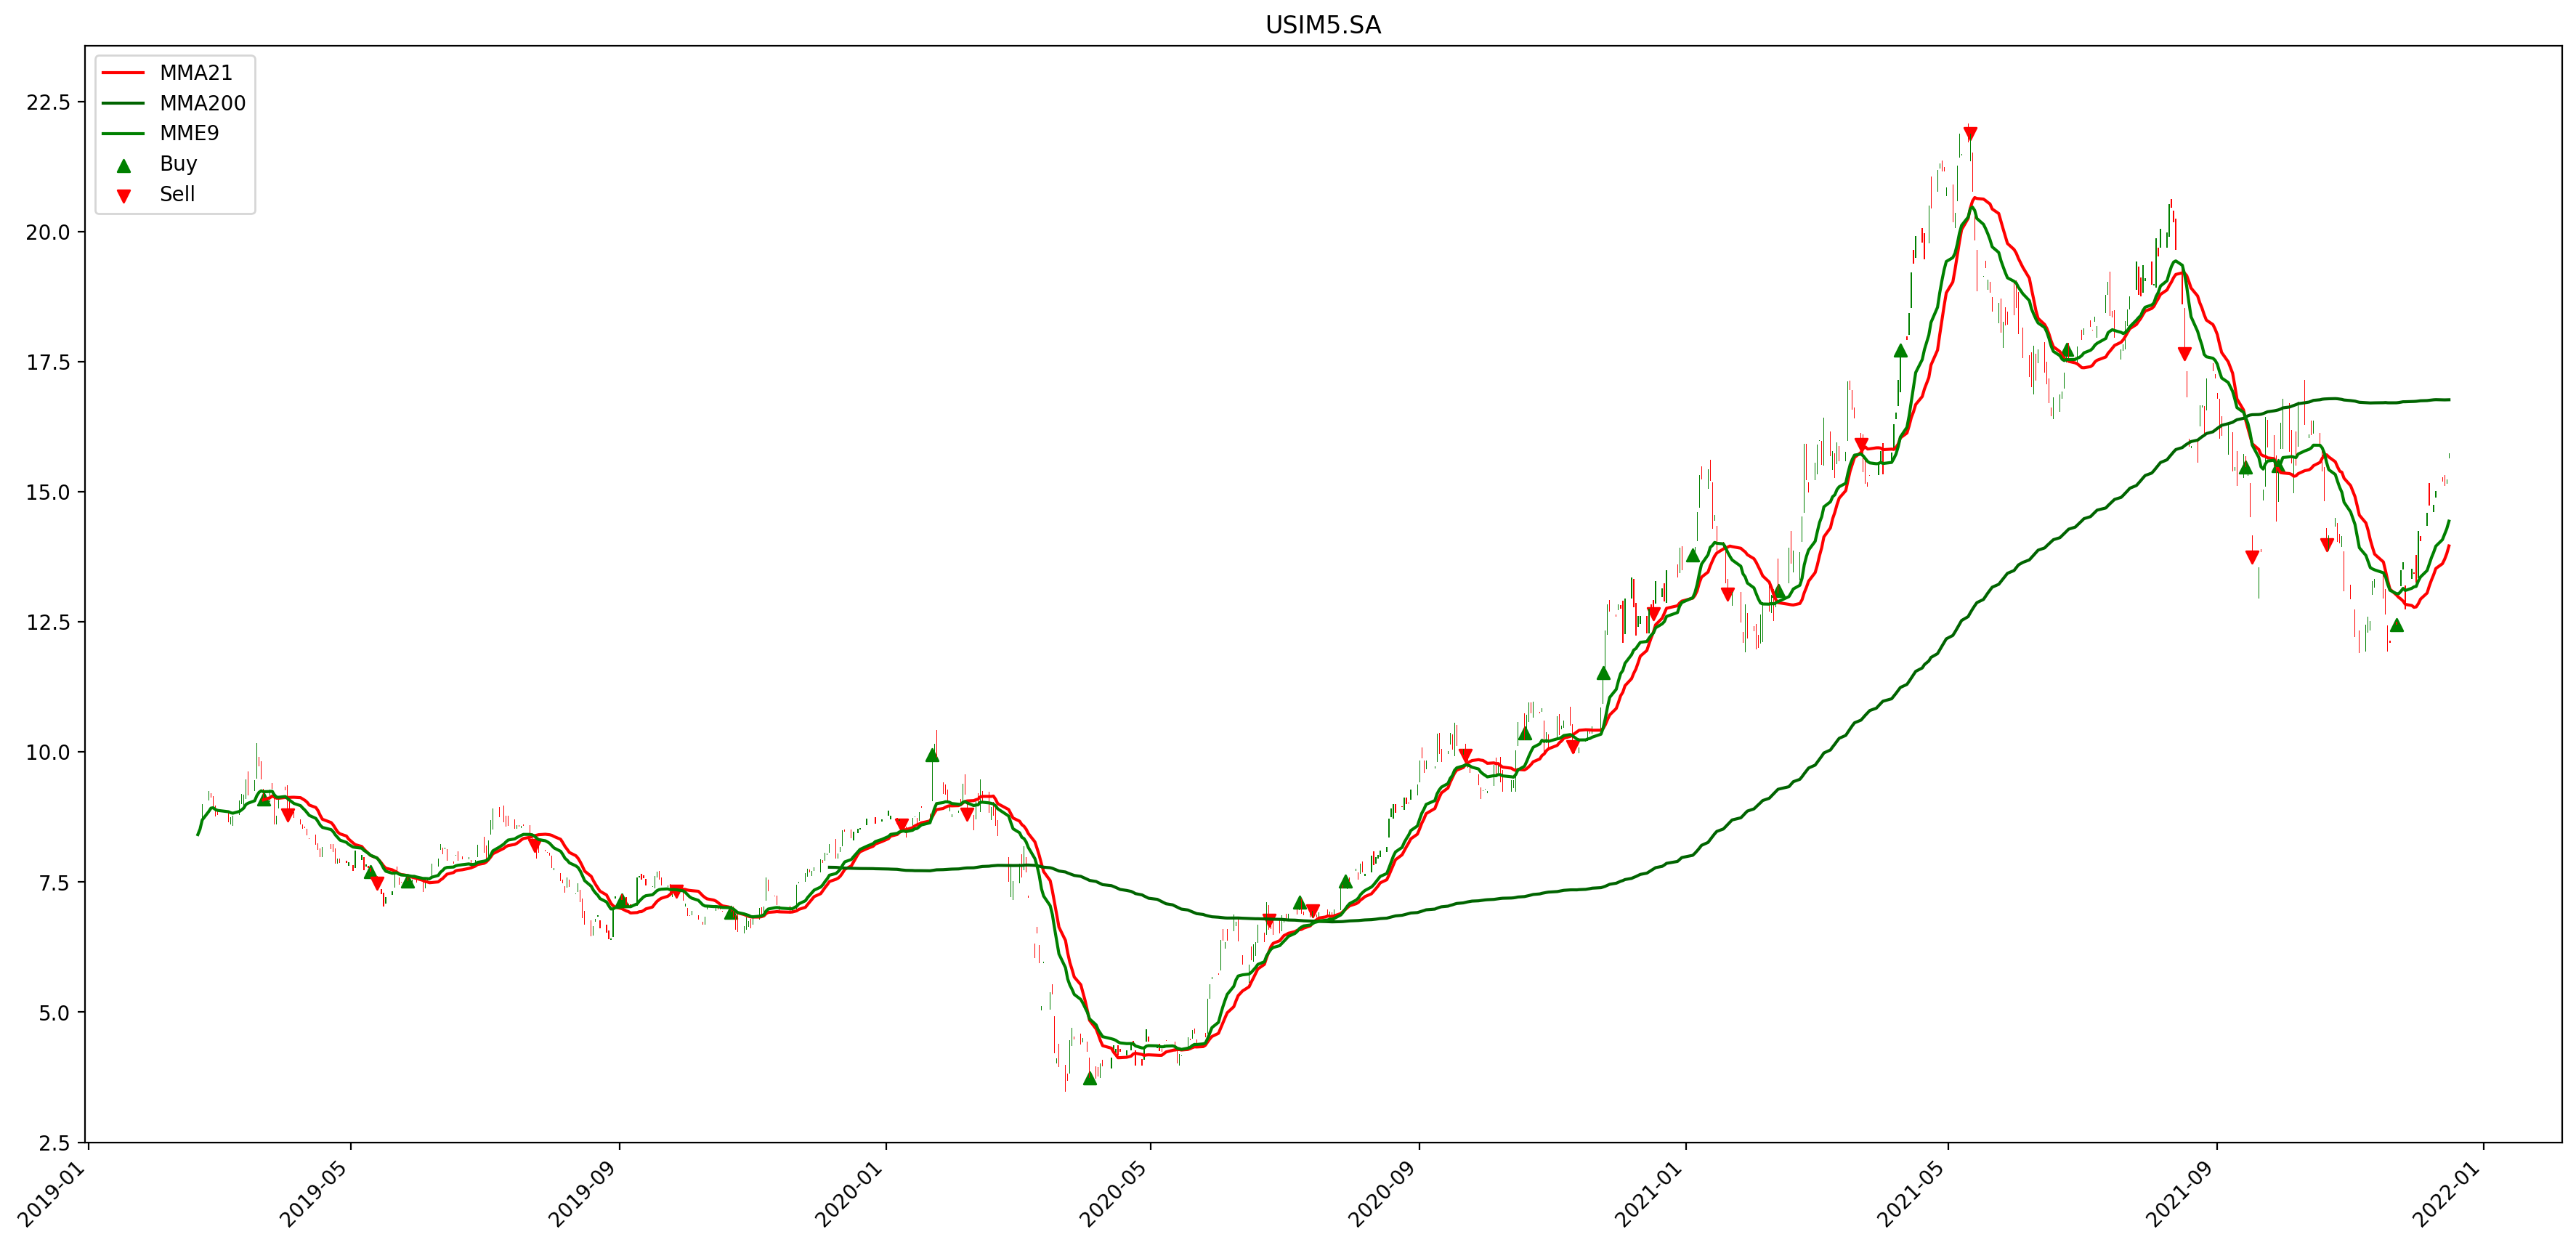

In [ ]:
#create figure
plt.figure(figsize=(22,10),dpi=200)

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = data[data.close>=data.open]
down = data[data.close<data.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index,down.high-down.open,width2,bottom=down.open,color=col2)
plt.bar(down.index,down.low-down.close,width2,bottom=down.close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')


#média aritmetica
plt.plot(mma21['close'], label="MMA21", color="red")
plt.plot(mma200['close'], label="MMA200", color="darkgreen")
#media exponencial
plt.plot(mme9['close'], label="MME9", color="green")


#indicativo
buy_or_sell = buy_sell(buy)
# buy
buy['Signal to Buy'] = buy_or_sell[0]
plt.scatter(buy.index, buy['Signal to Buy'], label ="Buy", marker ="^", color='green')
# sell
buy['Signal to Sell'] = buy_or_sell[1]
plt.scatter(buy.index, buy['Signal to Sell'], label ="Sell", marker ="v", color='red')


#legenda
plt.legend(loc="upper left")
#titulo
plt.title( re.search('<(.*)>', str(ticket)).group(1) )

#display candlestick chart
plt.show()


# 
##plt.fill( data.close.rolling(21).mean() , data.close.ewm(9).mean())
#plt.fill (mma21,mme9)




In [ ]:


data["Close"].plot(figsize=(24,8),label="IBOV")
data["Close"].rolling(21).mean().plot(label="MM21")
data["Close"].rolling(200).mean().plot(label="MM200")
data['Close'].ewm(9).mean().plot(label="EWM9")
plt.legend()


In [ ]:
mpf.plot(data,type='candle',mav=(20, 200),volume=True,style='yahoo')

In [ ]:
ibov_fatiado = ibov[ibov.index.year == 2020]
ibov_fatiado["Close"].plot(figsize=(22,8),label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [ ]:
ibov_fatiado = ibov[(ibov.index.year >= 2015) & (ibov.index.year <= 2017)]
ibov_fatiado["Close"].plot(figsize=(22,8),label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()